## Hstack Vectorization

### Init libraries:
- numpy: using for calculate
- matplotlib for graph

In [6]:
import numpy as np
import matplotlib.pyplot as plt

### Training function

In [ ]:
# Predict using linear function, it will return the prediction values y_hat
def predict(X, theta):
    return X.dot(theta)

# Compute loss using Mean Squared Error
def compute_loss(y, y_hat):
    loss = (y - y_hat) **2
    return loss
# Compute gradient
def compute_gradient(X, y, y_hat):
    return X.dot(y_hat - y)*2

# Update theta
def update_gradient(theta, gradient, learning_rate=0.001):
    return theta - learning_rate * gradient

### Prepare data

| Experience | Education | Salary |
|-------------|------------|--------|
| 3           | 12         | 60     |
| 4           | 13         | 55     |
| 5           | 14         | 66     |
| 6           | 15         | 93     |


In [27]:
# Experience and Education
X = np.array([[3, 12], [4, 13], [5, 14], [6, 15]])
# Salary
y = np.array([60, 55, 66, 93])

# Test data (record 2 of dataset)
X_test = np.array([[1, 4, 13]])

In [28]:
# Add bias term (intercept) to X
X_bias = np.c_[np.ones((X.shape[0], 1)), X]
print("X_bias shape:", X_bias.shape)
print("X_bias:\n", X_bias)
# Print shapes
print(f'Input shape: {X_bias.shape}')
print(f'Output shape: {y.shape}')

X_bias shape: (4, 3)
X_bias:
 [[ 1.  3. 12.]
 [ 1.  4. 13.]
 [ 1.  5. 14.]
 [ 1.  6. 15.]]
Input shape: (4, 3)
Output shape: (4,)


### Initialize parameters

In [38]:
# theta initialization theta = [bias, weight1, weight2]
theta = np.array([10, 3, 2])

### Loss before training

In [39]:
print("Initial theta:", theta)
print("y values (y):", y)
y_hat = predict(X_test, theta)
print("Predicted values (y_hat):", y_hat)
loss = compute_loss(y, y_hat)
print("Loss record 2 of sameple:", loss)

Initial theta: [10  3  2]
y values (y): [60 55 66 93]
Predicted values (y_hat): [48]
Loss record 2 of sameple: [ 144   49  324 2025]


### Train

In [40]:
epochs = 4
lr = 0.001  # Learning rate
N = len(y)
losses = []

for epoch in range(epochs):
    epoch_loss = []
    for i in range(N):
        # Take the i-th sample
        X_i = X_bias[i, :]
        y_i = y[i]

        # Predict
        y_hat = predict(X_i, theta)

        # Compute  MSE loss
        loss = compute_loss(y_i, y_hat)
        epoch_loss.append(loss)

        # Compute gradient
        gradient = compute_gradient(X_i, y_hat=y_hat, y=y_i)

        # Update theta
        theta = update_gradient(theta, gradient, lr)
    mean_loss = (np.sum(epoch_loss)) / len(epoch_loss)
    losses.append(mean_loss)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {mean_loss}, Theta: {theta}')
print("Final theta:", theta)
print("Final loss:", losses[-1])

Epoch 1/4, Loss: 234.6004982265337, Theta: [10.09833181  3.47050512  3.35549142]
Epoch 2/4, Loss: 130.86470802439834, Theta: [10.10382489  3.56374101  3.49816499]
Epoch 3/4, Loss: 138.41841820731062, Theta: [10.09861696  3.61319006  3.50074271]
Epoch 4/4, Loss: 139.08577029797195, Theta: [10.09220039  3.65739307  3.48719661]
Final theta: [10.09220039  3.65739307  3.48719661]
Final loss: 139.08577029797195


### Loss after training

In [41]:
print("Initial theta:", theta)
print("y values (y):", y)
y_hat = predict(X_test, theta)
print("Predicted values (y_hat):", y_hat)
loss = compute_loss(y, y_hat)
print("Loss record 2 of sameple:", loss)

Initial theta: [10.09220039  3.65739307  3.48719661]
y values (y): [60 55 66 93]
Predicted values (y_hat): [70.05532857]
Loss record 2 of sameple: [101.10963271 226.66291844  16.44568983 526.4579469 ]


### Loss visualization

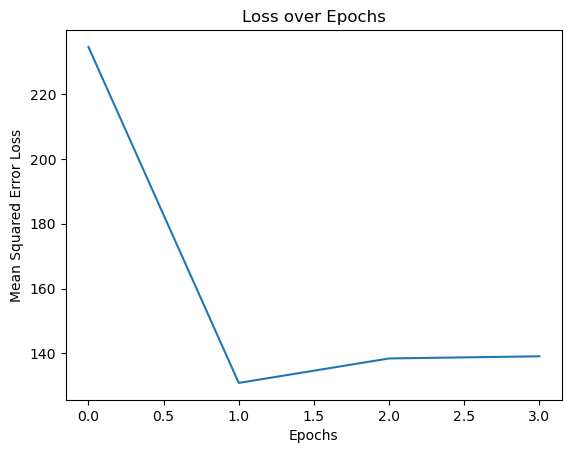

In [33]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.title('Loss over Epochs')
plt.show()

Conlusion:
The loss suddenly decreased after 1 epoch, but the test loss was still quite large, possibly because the training model was not deep enough and the data was small.

## Vectorization

In [8]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('../data/simple_data.csv', delimiter=',')
print(data)

[[6.7 9.1]
 [4.6 5.9]
 [3.5 4.6]
 [5.5 6.7]]


In [15]:
def predict(x, theta):
    return x.dot(theta)

def predict_way2(x, theta):
    return theta.T.dot(x)

# Mean Square Error
def compute_loss(y, y_hat):
    return (y_hat - y) ** 2

def compute_gradient(x, y, y_hat):
    return 2 * x * (y_hat - y)

def update_gradient(theta, dtheta, learning_rate=0.01):
    return theta - learning_rate * dtheta

In [52]:
N = data.shape[0]
# Add bias term (intercept) to X
x = data[:, 0]
y = data[:, 1]

theta = np.array([0.049, -0.34])

print("data:", data.shape)
print(f'Input shape: {x.shape}')
print(f'Output shape: {y.shape}')
print(f'Input x: {x}')

areas = x.reshape(1, N)
Y = y.reshape(N,)


print(f'Input areas shape: {areas.shape}')
print(f'Output prices shape: {Y.shape} \n')
print("---- After transform: ---")
X = np.vstack([np.ones((1, N)), areas])
print(X)
print(Y)

data: (4, 2)
Input shape: (4,)
Output shape: (4,)
Input x: [6.7 4.6 3.5 5.5]
Input areas shape: (1, 4)
Output prices shape: (4,) 

---- After transform: ---
[[1.  1.  1.  1. ]
 [6.7 4.6 3.5 5.5]]
[9.1 5.9 4.6 6.7]


In [53]:
lr = 0.01
losses = []
epochs = 10

for epoch in range(epochs):
    epoch_loss = []

    for i in range(N):
        # for each column
        x = X[:, i]
        y = Y[i] # each label

        # Forward probagation
        y_hat = predict(x, theta)

        loss = compute_loss(y, y_hat)
        epoch_loss.append(loss)
        print(loss)

        dtheta = compute_gradient(x, y, y_hat)

        theta = update_gradient(theta, dtheta, learning_rate=lr)
    losses.append(np.sum(epoch_loss) / len(epoch_loss))

print(theta)

128.34624100000002
0.042117054355360214
0.017143255451757537
0.046668355048423614
0.8102642031279953
0.15189122342145844
0.015167536202538833
0.25760117839621605
0.587449014693501
0.1565668474161118
0.015484171012711736
0.2621507903721882
0.5825573177153622
0.15537809860052929
0.015010928840951116
0.2629915543927167
0.5802139181638774
0.15412550290299254
0.014537462343023595
0.2637825444104964
0.5779179814546943
0.15288291543245522
0.014073640908492906
0.26457038452603016
0.5756377945629113
0.1516511707759244
0.013619472137557253
0.26535566755100237
0.5733728429055963
0.15043018252466867
0.013174841781006079
0.2661384020459839
0.5711230074744341
0.14921985353754552
0.012739635262035375
0.2669185892522232
0.5688881751869697
0.14802008742351738
0.012313739180280763
0.26769623041374296
[0.2335058  1.21100306]


In [54]:
print(np.round(losses, decimals=3))

[32.113  0.309  0.255  0.254  0.253  0.252  0.252  0.251  0.25   0.249]


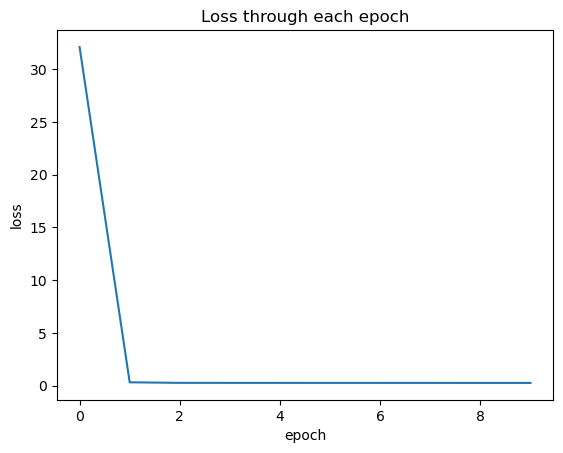

In [55]:
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss through each epoch')
plt.show()

b = 0.2335058012216848
w = 1.211003060457185
x =  [6.7 4.6 3.5 5.5]
x_range =  range(2, 8) , y_predict =  [2.65551192 3.86651498 5.07751804 6.2885211  7.49952416 8.71052722]


[]

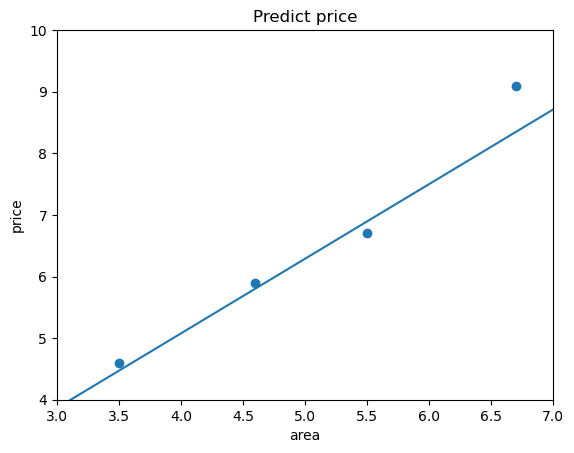

In [68]:
# Draw the predict line with data
# y = w * x + b
b, w = theta[0], theta[1]
print(f"b = {b}")
print(f"w = {w}")
# input x, y into the predict line
x = X[1, :]
x_range = range(max(0, int(min(x)) - 1), int(max(x)) + 2)
print("x = ", x)
y_predict = w * x_range + b
# y_data = [x*w + b for x in x_data]
print("x_range = ", x_range, ", y_predict = ", y_predict)
plt.plot(x_range, y_predict)
plt.xlabel("area")
plt.ylabel("price")
plt.title("Predict price")

# we need to put the data into the LR line plot
plt.scatter(areas, Y)
plt.xlim(3,7)
plt.ylim(4,10)
plt.plot()


## Advertising data

### 1 sample way 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('../data/advertising.csv', delimiter=',', skip_header=1)
print(data[:5, :]) # print first 5 rows
print(data.shape)
max_col_index = data.shape[1] - 1

X = data[:, :max_col_index]
y = data[:, max_col_index:]
N = data.shape[0]

print("data:", data.shape)
print(f'Input shape: {X.shape}')
print(f'Output shape: {y.shape}')

[[230.1  37.8  69.2  22.1]
 [ 44.5  39.3  45.1  10.4]
 [ 17.2  45.9  69.3  12. ]
 [151.5  41.3  58.5  16.5]
 [180.8  10.8  58.4  17.9]]
(200, 4)
data: (200, 4)
Input shape: (200, 3)
Output shape: (200, 1)


In [5]:
# Add bias
X_bias = np.hstack(
    (np.ones((N, 1)), X)
)
print(X_bias[:5, :])
print(y[:5])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]
[[22.1]
 [10.4]
 [12. ]
 [16.5]
 [17.9]]


In [60]:
number_of_parameters = max_col_index + 1 # features + bias
epochs = 50
learning_rate = 0.00001
thetas = np.random.randn(number_of_parameters, 1) # "standard normal" distribution
# print("thetas = ", thetas)
thetas_logs = [thetas]
losses = []
all_epoch_losses = []

for epoch in range(epochs):
    epoch_losses = []
    for i in range(N):
        # xi = X_bias[i, ] # shape (4, )
        xi = np.reshape(X_bias[i], (4, 1))
        # xi = np.reshape(xi, (4, 1)) # transpose xi
        yi = y[i] # shape (1,)
        yi = y[i:i+1] # shape (1,1)

        y_hat = xi.T.dot(thetas)

        # loss = (y_hat - yi) ** 2
        loss = (y_hat - yi)*(y_hat - yi)
        # print(loss.shape) #(1,1)
        epoch_losses.append(loss[0][0]) # append a scalar number so we get the first and only number in 2D array loss
        all_epoch_losses.append(loss[0][0])

        dthetas = 2 * xi * (y_hat - yi)

        thetas = thetas - learning_rate * dthetas
    losses.append(np.sum(epoch_losses) / len(epoch_losses))
    thetas_logs.append(thetas)

print("Final thetas = ", thetas)

Final thetas =  [[-0.32345359]
 [ 0.07601436]
 [ 0.1642109 ]
 [ 0.01982714]]


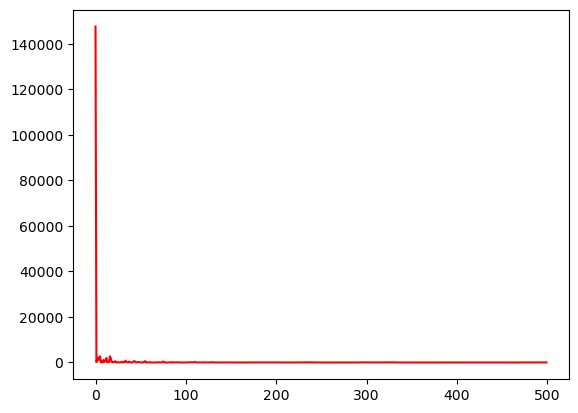

In [61]:
x_axis = list(range(500))
plt.plot(x_axis, all_epoch_losses[:500], color="r")
plt.show()

### 1 sample way 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('../data/advertising.csv', delimiter=',', skip_header=1)
print(data[:5, :]) # print first 5 rows
print(data.shape)
max_col_index = data.shape[1] - 1

print("data:", data.shape)

In [71]:
number_of_parameters = max_col_index + 1 # features + bias
epochs = 50
learning_rate = 0.00001
thetas = np.random.randn(number_of_parameters, ) # "standard normal" distribution
# print("thetas = ", thetas)
thetas_logs = [thetas]
losses = []
all_epoch_losses = []

for epoch in range(epochs):
    epoch_losses = []
    for i in range(N):
        samplei = data[i]

        # convert to vector
        xi = np.array([1, samplei[0], samplei[1], samplei[2]])
        yi =samplei[max_col_index]

        y_hat = xi.T.dot(thetas)

        # loss = (y_hat - yi) ** 2
        loss = (y_hat - yi)*(y_hat - yi)
        # print(loss.shape) #()
        epoch_losses.append(loss) # append a scalar number so we get the first and only number in 2D array loss
        all_epoch_losses.append(loss)

        # dthetas = 2 * (y_hat - yi) * xi # same for line below
        dthetas = 2 * xi * (y_hat - yi)

        thetas = thetas - learning_rate * dthetas
    losses.append(np.sum(epoch_losses) / len(epoch_losses))
    thetas_logs.append(thetas)

print("Final thetas = ", thetas)

Final thetas =  [-0.06827308  0.07493643  0.16143279  0.01857745]


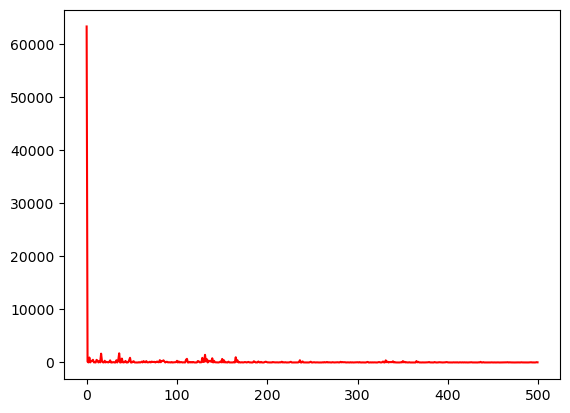

In [70]:
x_axis = list(range(500))
plt.plot(x_axis, all_epoch_losses[:500], color="r")
plt.show()